# Path Configuration

In [1]:
import os
import sys
import argparse

root = "../"*3
src_path = os.path.join(root, "kyoka")
sample_path = os.path.join(root, "sample")
sys.path.append(root)
sys.path.append(src_path)
sys.path.append(sample_path)

import logging as log
log.basicConfig(format='[%(levelname)s] %(message)s', level=log.DEBUG)

from kyoka.algorithm.montecarlo.montecarlo import MonteCarlo
from kyoka.algorithm.td_learning.sarsa import Sarsa
from kyoka.algorithm.td_learning.q_learning import QLearning
from kyoka.algorithm.td_learning.sarsa_lambda import SarsaLambda
from kyoka.algorithm.td_learning.q_lambda import QLambda

from kyoka.policy.epsilon_greedy_policy import EpsilonGreedyPolicy
from kyoka.finish_rule.watch_iteration_count import WatchIterationCount

from sample.maze.maze_domain import MazeDomain
from sample.maze.maze_table_value_function import MazeTableValueFunction
from sample.maze.maze_helper import MazeHelper
from sample.maze.maze_performance_logger import MazePerformanceLogger
from sample.maze.maze_transformer import MazeTransformer

# Define Const for Performance Test

# Setup Global Item for Performance Test

In [89]:
%matplotlib inline
import seaborn
import matplotlib.pyplot as plt

maze_file_path = lambda maze_type: "../script/%s.txt" % maze_type
transform_file_path = lambda maze_type: "../script/%s_transformed.txt" % maze_type

def gen_callbacks(maze_type, transform_timing):
    callbacks = [MazePerformanceLogger()]
    if maze_type in ["blocking", "shortcut"]:
        transfomer = MazeTransformer()
        transfomer.set_transformation(transform_timing, transform_file_path(maze_type))
        callbacks.append(transfomer)
    return callbacks

def run_performance_test(maze_type, rl_algo, epsilon, test_length, transform_timing):
    watch_iteration = WatchIterationCount(target_count=test_length, log_interval=1000)
    finish_rules = [watch_iteration]
    domain = MazeDomain()
    domain.read_maze(maze_file_path(maze_type))
    value_func = MazeTableValueFunction(domain.get_maze_shape())
    value_func.setUp()
    policy = EpsilonGreedyPolicy(domain, value_func, eps=epsilon)
    callbacks = gen_callbacks(maze_type, transform_timing)
    [rl_algo.set_gpi_callback(callback) for callback in callbacks]
    rl_algo.GPI(domain, policy, value_func, finish_rules)
    return callbacks[0].step_log, callbacks[0].policy_log

def visualize_maze(maze_type):
    domain = MazeDomain()
    domain.read_maze(maze_file_path(maze_type))
    print domain.get_maze_shape()
    print MazeHelper.visualize_maze(domain.maze)

def visualize_step_transition(step_log):
    print "minimum step => %d" % min(step_log)
    plt.plot(step_log, label="step")
    plt.xlabel("GPI iteration")
    plt.ylabel("step")
    plt.show()
    
def visualize_policy_transition(step_log, policy_log, sampling_interval):
    sampled_log = [(item[0]+1, item[1]) for item in enumerate(policy_log) if (item[0]+1)%sampling_interval==0]
    for iteration, log in sampled_log:
        minimum_step = min(step_log[:iteration])
        print "After %d th iteration (minimum step => %d)" % (iteration, minimum_step)
        print log
        print

# DynaMaze

In [59]:
MAZE_TYPE = "dyna"
TRANSFORM_TIMING = 0
visualize_maze(MAZE_TYPE)

(6, 9)
-------XG
--X----X-
S-X----X-
--X------
-----X---
---------


## Sarsa

minimum step => 16


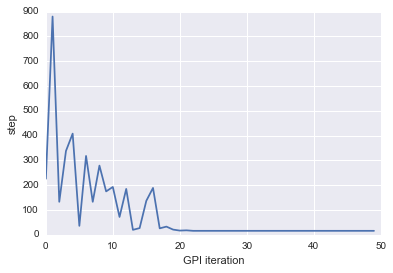

After 5 th iteration (minimum step => 133)
--------G
--------^
--------^
--------^
--------^
---------

After 10 th iteration (minimum step => 36)
--------G
--------^
--------^
----->v-^
------>>^
------^--

After 15 th iteration (minimum step => 20)
--------G
--------^
----v-v-^
--->>>v-^
---^-->>^
------^--

After 20 th iteration (minimum step => 20)
--------G
------v-^
----v-v-^
-v->>>v-^
>>>^-->>^
------^--

After 25 th iteration (minimum step => 16)
--------G
------v-^
vv--v-v-^
>v->>>v-^
>>>^-->>^
------^--

After 30 th iteration (minimum step => 16)
--------G
------v-^
vv--v-v-^
>v->>>v-^
>>>^-->>^
------^--

After 35 th iteration (minimum step => 16)
--------G
------v-^
vv--vvv-^
>v->>>v-^
>>>^<->>^
-^--->^-^

After 40 th iteration (minimum step => 16)
--------G
------v-^
vv--vvv-^
>v->>>vv^
>>>^<->>^
-^--->^-^

After 45 th iteration (minimum step => 16)
--------G
------v-^
vv--vvv-^
>v->>>vv^
>>>^<->>^
-^--->^-^

After 50 th iteration (minimum step => 16)
--------G
------v-^
v

In [93]:
TEST_LENGTH = 50
EPSILON = 0.1
step_log, policy_log = run_performance_test(
    maze_type=MAZE_TYPE, rl_algo=Sarsa(alpha=0.1, gamma=0.7),
    epsilon=EPSILON, test_length=TEST_LENGTH, transform_timing=TRANSFORM_TIMING)
visualize_step_transition(step_log)
visualize_policy_transition(step_log, policy_log, sampling_interval=5)

minimum step => 16


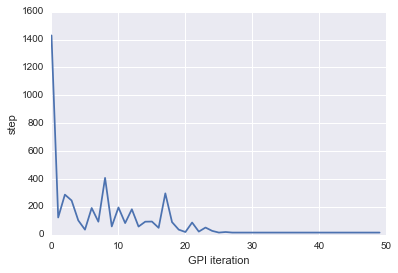

After 5 th iteration (minimum step => 103)
--------G
--------^
--------^
--------^
------->^
---------

After 10 th iteration (minimum step => 37)
--------G
--------^
--------^
------v-^
------>>^
----->^^-

After 15 th iteration (minimum step => 37)
--------G
--------^
----->v-^
----->v>^
------>>^
---->>^^-

After 20 th iteration (minimum step => 37)
--------G
--------^
----->v-^
---->>v>^
-->>v->>^
---^>>^^<

After 25 th iteration (minimum step => 20)
--------G
--------^
-v--->v-^
-v-v>>v>^
->>>v->>^
-^^^>>^^<

After 30 th iteration (minimum step => 16)
--------G
--------^
>v--->v-^
vv-v>>>>^
>>>>v->>^
-^^^>>^^<

After 35 th iteration (minimum step => 16)
--------G
--------^
>v--->v-^
vv-v>>>>^
>>>>v->>^
^^^^>>^^<

After 40 th iteration (minimum step => 16)
--------G
--------^
>v--->v-^
vv-v>>>>^
>>>>v->>^
^^^^>>^^<

After 45 th iteration (minimum step => 16)
--------G
--------^
>v--->v-^
vv-v>>>>^
>>>>v->>^
^^^^>>^^<

After 50 th iteration (minimum step => 16)
--------G
v-------^
>

In [94]:
TEST_LENGTH = 50
EPSILON = 0.3
step_log, policy_log = run_performance_test(
    maze_type=MAZE_TYPE, rl_algo=Sarsa(alpha=0.1, gamma=0.7),
    epsilon=EPSILON, test_length=TEST_LENGTH, transform_timing=TRANSFORM_TIMING)
visualize_step_transition(step_log)
visualize_policy_transition(step_log, policy_log, sampling_interval=5)

minimum step => 14


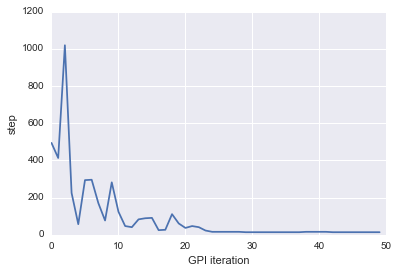

After 5 th iteration (minimum step => 57)
--------G
--------^
--------^
--------^
--------^
---------

After 10 th iteration (minimum step => 57)
--------G
--------^
--------^
-------v^
------>>^
------^^^

After 15 th iteration (minimum step => 41)
--------G
--------^
----->v-^
---->>>>^
------>>^
----->^^^

After 20 th iteration (minimum step => 25)
--------G
----v-v-^
--->>vv-^
---->>>>^
--->^->>^
>>>>^>^^^

After 25 th iteration (minimum step => 16)
--------G
----v-v-^
v-->>>v-^
vv->>>>>^
v<>>^-^>^
>>>>^>>>^

After 30 th iteration (minimum step => 14)
--------G
>v--v-v-^
v<->>>v-^
>v->>>>>^
v>>>^-^>^
>>>>^>^>^

After 35 th iteration (minimum step => 14)
--------G
>v--vvv-^
vv->>>v-^
>v->>>>>^
v>>>^-^>^
>>>>^>^>^

After 40 th iteration (minimum step => 14)
v<--v-v-G
>v--vvv-^
vv-vvvv-^
>v->>>>>^
vv>>^-^>^
>>>>^>^>^

After 45 th iteration (minimum step => 14)
v<--vvv-G
>v--vvv-^
>v-vvvv-^
>v->>>>>^
>>>>^-^>^
>>^>^>^>^

After 50 th iteration (minimum step => 14)
v<--vvv-G
v<-vvvv-^
vv

In [95]:
TEST_LENGTH = 50
EPSILON = 0.7
step_log, policy_log = run_performance_test(
    maze_type=MAZE_TYPE, rl_algo=Sarsa(alpha=0.1, gamma=0.7),
    epsilon=EPSILON, test_length=TEST_LENGTH, transform_timing=TRANSFORM_TIMING)
visualize_step_transition(step_log)
visualize_policy_transition(step_log, policy_log, sampling_interval=5)

# QLearning

minimum step => 14


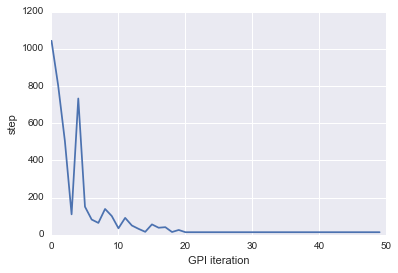

After 5 th iteration (minimum step => 110)
--------G
--------^
--------^
------->^
-------^-
---------

After 10 th iteration (minimum step => 64)
--------G
--------^
------v-^
---->>>>^
-------^^
---------

After 15 th iteration (minimum step => 16)
--------G
--------^
------v-^
--->>>>>^
->>>^--^^
---------

After 20 th iteration (minimum step => 15)
--------G
------v-^
----v-v-^
vv->>>>>^
>>>>^--^^
---------

After 25 th iteration (minimum step => 14)
--------G
------v-^
v---v-v-^
vv->>>>>^
>>>>^--^^
---------

After 30 th iteration (minimum step => 14)
--------G
------v-^
v---vvv-^
vv->>>>>^
>>>>^-^^^
->^------

After 35 th iteration (minimum step => 14)
--------G
----v-v-^
v---vvv-^
vv->>>>>^
>>>>^-^^^
->^-^----

After 40 th iteration (minimum step => 14)
--------G
----v-v-^
v---vvv-^
vv->>>>>^
>>>>^-^^^
->^-^----

After 45 th iteration (minimum step => 14)
--------G
----v-v-^
v---vvv-^
vv->>>>>^
>>>>^-^^^
->^<^----

After 50 th iteration (minimum step => 14)
--------G
----v-v-^
v

In [96]:
TEST_LENGTH = 50
EPSILON = 0.1
step_log, policy_log = run_performance_test(
    maze_type=MAZE_TYPE, rl_algo=QLearning(alpha=0.1, gamma=0.7),
    epsilon=EPSILON, test_length=TEST_LENGTH, transform_timing=TRANSFORM_TIMING)
visualize_step_transition(step_log)
visualize_policy_transition(step_log, policy_log, sampling_interval=5)

minimum step => 16


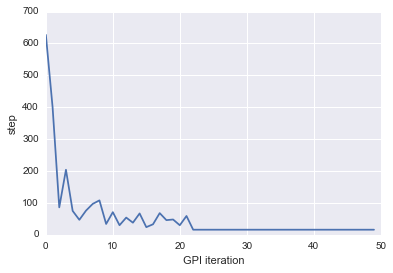

After 5 th iteration (minimum step => 75)
--------G
--------^
--------^
------>>^
-------^-
---------

After 10 th iteration (minimum step => 34)
--------G
---->vv-^
----^v<-^
----->>>^
------>^-
-------^-

After 15 th iteration (minimum step => 30)
---->v--G
--->>vv-^
--->^v<-^
---^>>>>^
------>^-
-------^-

After 20 th iteration (minimum step => 24)
->>v>vv-G
--->>vv-^
--->>v<-^
---^>>>>^
---^^->^^
-------^-

After 25 th iteration (minimum step => 16)
>>>vvvv-G
-^->vvv-^
>^->>v<-^
^--^>>>>^
---^^->^^
-------^-

After 30 th iteration (minimum step => 16)
>>>vvvv-G
>^->vvv-^
>^->>v<-^
^--^>>>>^
---^^->^^
-------^-

After 35 th iteration (minimum step => 16)
>>>vvvv-G
>^->vvv-^
>^->>v<-^
^--^>>>>^
---^^->^^
-------^-

After 40 th iteration (minimum step => 16)
>>>vvvv-G
>^->vvv-^
>^->>v<-^
^--^>>>>^
---^^->^^
------^^^

After 45 th iteration (minimum step => 16)
>>>vvvv-G
>^->vvv-^
>^->>v<-^
^^-^>>>>^
---^^->^^
------^^^

After 50 th iteration (minimum step => 16)
>>>vvvv-G
>^->vvv-^
>^

In [97]:
TEST_LENGTH = 50
EPSILON = 0.3
step_log, policy_log = run_performance_test(
    maze_type=MAZE_TYPE, rl_algo=QLearning(alpha=0.1, gamma=0.7),
    epsilon=EPSILON, test_length=TEST_LENGTH, transform_timing=TRANSFORM_TIMING)
visualize_step_transition(step_log)
visualize_policy_transition(step_log, policy_log, sampling_interval=5)

minimum step => 14


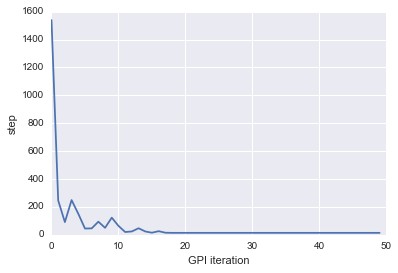

After 5 th iteration (minimum step => 91)
--------G
--------^
--------^
------>>^
------^^^
-------^-

After 10 th iteration (minimum step => 45)
--->>v--G
----^vv-^
--->>>v-^
---->^>>^
------>^^
-------^^

After 15 th iteration (minimum step => 20)
--->>vv-G
----^>v-^
--->>vv-^
--->^>>>^
-->^^-^^^
--^>^--^^

After 20 th iteration (minimum step => 14)
--->>vv-G
--->v>v-^
vv->vvv-^
vv->>>>>^
>>>^^->^^
>>^>^-^^^

After 25 th iteration (minimum step => 14)
->>v>vv-G
>v->vvv-^
v<->>vv-^
vv->>>>>^
>>>^^->^^
>^^>^>^<^

After 30 th iteration (minimum step => 14)
->>v>vv-G
vv-vvvv-^
v<->vvv-^
vv->>>>>^
>>>^^->^^
^^^^^>^^^

After 35 th iteration (minimum step => 14)
>v>v>vv-G
vv-v>vv-^
vv-vvvv-^
vv->>>>>^
>>>^^->^^
^^^^>>^^^

After 40 th iteration (minimum step => 14)
>v>v>vv-G
vv-v>vv-^
>v-vvvv-^
vv->>>>>^
>>>^^->^^
^^^^>>^^^

After 45 th iteration (minimum step => 14)
>v>v>vv-G
vv->vvv-^
>v-vvvv-^
vv->>>>>^
>>>^^->^^
^^^^>>^^^

After 50 th iteration (minimum step => 14)
>v>v>vv-G
vv->vvv-^
>v

In [98]:
TEST_LENGTH = 50
EPSILON = 0.7
step_log, policy_log = run_performance_test(
    maze_type=MAZE_TYPE, rl_algo=QLearning(alpha=0.1, gamma=0.7),
    epsilon=EPSILON, test_length=TEST_LENGTH, transform_timing=TRANSFORM_TIMING)
visualize_step_transition(step_log)
visualize_policy_transition(step_log, policy_log, sampling_interval=5)

# SarsaLambda

minimum step => 18


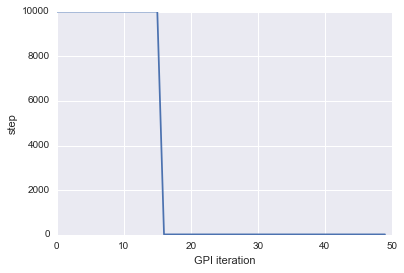

After 5 th iteration (minimum step => 10000)
>>>vv---G
^--<>>v-^
^-->>^v-^
----^>^v^
------^>^
---------

After 10 th iteration (minimum step => 10000)
>>>vv---G
^<-<>>v-^
^^->>^v-^
----^>^v^
------^>^
---------

After 15 th iteration (minimum step => 10000)
>>>vv<--G
^<-<>>v-^
^^->>^v-^
^---^>>v^
------^>^
---------

After 20 th iteration (minimum step => 18)
>>>vv<v-G
^<->>>v-^
^^->>^v-^
^---^>>v^
------^>^
---------

After 25 th iteration (minimum step => 18)
>>>vv<v-G
^<->>>v-^
^^->>^v-^
^---^>>v^
------^>^
---------

After 30 th iteration (minimum step => 18)
>>>vv<v-G
^<->>>v-^
^^->^>v-^
^---^>>v^
------^>^
---------

After 35 th iteration (minimum step => 18)
>>>vv<v-G
^<->>>v-^
^^->^>v-^
^---^>>v^
------^>^
---------

After 40 th iteration (minimum step => 18)
>>>vv<v-G
^<->>>v-^
^^->^>v-^
^---^>>v^
------^>^
---------

After 45 th iteration (minimum step => 18)
>>>vv<v-G
^<->>>v-^
^^->^>v-^
^---^>>v^
------^>^
--------^

After 50 th iteration (minimum step => 18)
>>>vv<v-G
^<-

In [105]:
TEST_LENGTH = 50
EPSILON = 0.1
step_log, policy_log = run_performance_test(
    maze_type=MAZE_TYPE, rl_algo=SarsaLambda(alpha=0.1, gamma=0.9),
    epsilon=EPSILON, test_length=TEST_LENGTH, transform_timing=TRANSFORM_TIMING)
visualize_step_transition(step_log)
visualize_policy_transition(step_log, policy_log, sampling_interval=5)

minimum step => 22


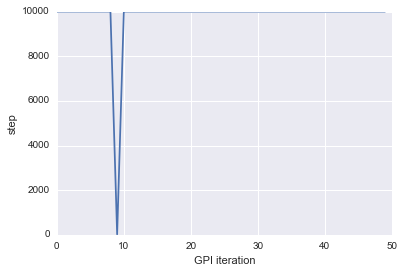

After 5 th iteration (minimum step => 10000)
>><<<>v-G
^v-^^<^->
^v-^<^^-^
v<-<v><^^
>vv<v-v>^
<^vv<<>>^

After 10 th iteration (minimum step => 22)
v^>^>><-G
>>->>v>-^
v<-^<>v-^
vv-^vvv^^
>v<^<->>^
^>>^<<<^-

After 15 th iteration (minimum step => 22)
v<<>^vv-G
vv-<<vv-^
>v-^>>v-^
^v->^vv^^
^^>v^->>^
^^^^<<<^-

After 20 th iteration (minimum step => 22)
v<<<^vv-G
v^-<<vv-^
<>-^>>v-^
>^->^vv^^
^>^^<->>^
^^<<v<<<<

After 25 th iteration (minimum step => 22)
<<><^v<-G
v>-<<v^-^
<^-^>>v-^
><->^vv^^
><^^^->>^
v<v<><<<<

After 30 th iteration (minimum step => 22)
v<>^^v<-G
^v-^<v^-^
<<-^>>v-^
^^->^vv^^
>v^>^->>^
v^v<><<<<

After 35 th iteration (minimum step => 22)
v^<<vvv-G
v>-><v^-^
v>->>>v-^
>^-<^vv^^
^^^>^->>^
v<v<><<<<

After 40 th iteration (minimum step => 22)
vv<<vvv-G
>v->>v^-^
v<->>>v-^
v<->^vv^^
<>><^->>^
>^^<v<<^<

After 45 th iteration (minimum step => 22)
<v><v<v-G
vv->>v^-^
^^->>>v-^
^^-^vvv^^
>v>^>->>^
><^<><<^<

After 50 th iteration (minimum step => 22)
>v<<v<v-G
>v->>vv-^

In [100]:
TEST_LENGTH = 50
EPSILON = 0.3
step_log, policy_log = run_performance_test(
    maze_type=MAZE_TYPE, rl_algo=SarsaLambda(alpha=0.1, gamma=0.7),
    epsilon=EPSILON, test_length=TEST_LENGTH, transform_timing=TRANSFORM_TIMING)
visualize_step_transition(step_log)
visualize_policy_transition(step_log, policy_log, sampling_interval=5)

minimum step => 16


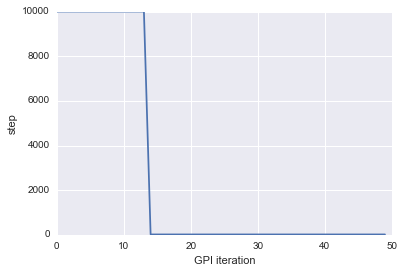

After 5 th iteration (minimum step => 10000)
--------G
------v->
vv-vv->-^
v<-><>>>^
>>>>v->>^
---^><^>^

After 10 th iteration (minimum step => 10000)
--------G
------v->
vv-vv->-^
v>->>>>>^
>>>>v->>^
---^>>^>^

After 15 th iteration (minimum step => 16)
-v------G
v>----v-^
vv-vv->-^
v>->>>>>^
>>>>v->>^
^^-^>>^>^

After 20 th iteration (minimum step => 16)
-v------G
v>----v-^
vv-vv->-^
v>->>>>>^
>>>>v->>^
^^-^>>^>^

After 25 th iteration (minimum step => 16)
-v------G
v>----v-^
vv-vv->-^
v>->>>>>^
>>>>v->>^
^^-^>>^>^

After 30 th iteration (minimum step => 16)
-v------G
v>----v-^
vv-vv->-^
v>->>>>>^
>>>>v->>^
^^-^>>^>^

After 35 th iteration (minimum step => 16)
-v------G
v>----v-^
vv-vv->-^
v>-<>>>>^
>>>>v->>^
^^<^>>^>^

After 40 th iteration (minimum step => 16)
-v------G
v>----v-^
vv-vv->-^
v>-<>>>>^
>>>>v->>^
^^<^>>^>^

After 45 th iteration (minimum step => 16)
-v------G
v>----v-^
vv-vv->-^
v>-<>>>>^
>>>>v->>^
^^<^>>^>^

After 50 th iteration (minimum step => 16)
-v------G
v>----

In [106]:
TEST_LENGTH = 50
EPSILON = 0.3
step_log, policy_log = run_performance_test(
    maze_type=MAZE_TYPE, rl_algo=SarsaLambda(alpha=0.1, gamma=0.9),
    epsilon=EPSILON, test_length=TEST_LENGTH, transform_timing=TRANSFORM_TIMING)
visualize_step_transition(step_log)
visualize_policy_transition(step_log, policy_log, sampling_interval=5)

minimum step => 16


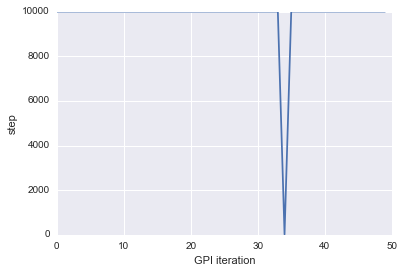

After 5 th iteration (minimum step => 10000)
>^v<>v^-G
<<-vv<>-^
>>->v<^-^
><-^>v>>^
v<<>v-v^^
<^>>>^>v<

After 10 th iteration (minimum step => 10000)
<^v>>v^-G
>v-v<^>-^
>^-<<<>-^
<<-<>>>>^
v<^<>-^^^
^vv<^>^^<

After 15 th iteration (minimum step => 10000)
<^v>>v>-G
><-<^v>-^
v^-><^>-^
><->>>>>^
v<<<v-v^^
><^<^<>^<

After 20 th iteration (minimum step => 10000)
<^v>vvv-G
v<-<<v<-^
v>-v<<>-^
<v->>>>>^
v><<v-<^^
>>><v<v^<

After 25 th iteration (minimum step => 10000)
<^v>>vv-G
vv-^<v<-^
v>-<><>-^
^<-<>v>>^
v><>v-<^^
vv<v^<v^<

After 30 th iteration (minimum step => 10000)
<>>>^v>-G
>v-^<v<-^
^v-^^v<-^
vv-<<><>^
>>>>v-^^v
>^<<^>v^>

After 35 th iteration (minimum step => 16)
vv<<<v>-G
>>-v^v<-^
>v-<<^^-^
vv-<<>>>^
>>>>v-^^v
>^<<>>^^>

After 40 th iteration (minimum step => 16)
>v<<<><-G
><-^^<^-^
>^-v<<>-^
<v-><<>>^
<<vvv-^^v
^><<^>>^>

After 45 th iteration (minimum step => 16)
>^v^>^<-G
^>-^^<^-^
v<->^<>-^
v<->^<>>^
>v<<v-<v^
^><<^^<^<

After 50 th iteration (minimum step => 16)
>><<

In [101]:
TEST_LENGTH = 50
EPSILON = 0.7
step_log, policy_log = run_performance_test(
    maze_type=MAZE_TYPE, rl_algo=SarsaLambda(alpha=0.1, gamma=0.7),
    epsilon=EPSILON, test_length=TEST_LENGTH, transform_timing=TRANSFORM_TIMING)
visualize_step_transition(step_log)
visualize_policy_transition(step_log, policy_log, sampling_interval=5)

# QLambda

minimum step => 20


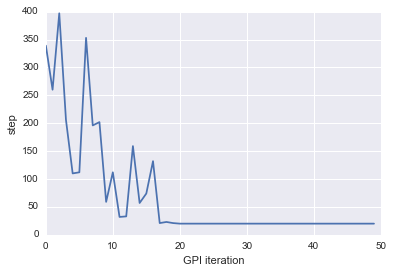

After 5 th iteration (minimum step => 110)
--------G
--------^
--------^
--------^
--------^
--------^

After 10 th iteration (minimum step => 59)
--------G
--------^
------v-^
------v-^
------>v^
------->^

After 15 th iteration (minimum step => 32)
---v<---G
--->>v--^
---->>v-^
------v-^
------>v^
------^>^

After 20 th iteration (minimum step => 21)
>>>v<---G
^<->>v--^
---->>v-^
------v-^
------>v^
--->>>^>^

After 25 th iteration (minimum step => 20)
>>>v<---G
^<->>v--^
^--->>v-^
------v-^
------>v^
--->>>^>^

After 30 th iteration (minimum step => 20)
>>>v<---G
^<->>v--^
^--->>v-^
------v-^
------>v^
--->>>^>^

After 35 th iteration (minimum step => 20)
>>>v<---G
^<->>v--^
^--->>v-^
------v>^
------>v^
--->>>^>^

After 40 th iteration (minimum step => 20)
>>>v<v--G
^<->>v--^
^--->>v-^
------v>^
------>v^
--->>>^>^

After 45 th iteration (minimum step => 20)
>>>v<v--G
^<->>v--^
^--->>v-^
------v>^
------>v^
--->>>^>^

After 50 th iteration (minimum step => 20)
>>>v<v--G
^<->>v--^
^

In [102]:
TEST_LENGTH = 50
EPSILON = 0.1
step_log, policy_log = run_performance_test(
    maze_type=MAZE_TYPE, rl_algo=QLambda(alpha=0.1, gamma=0.7),
    epsilon=EPSILON, test_length=TEST_LENGTH, transform_timing=TRANSFORM_TIMING)
visualize_step_transition(step_log)
visualize_policy_transition(step_log, policy_log, sampling_interval=5)

minimum step => 16


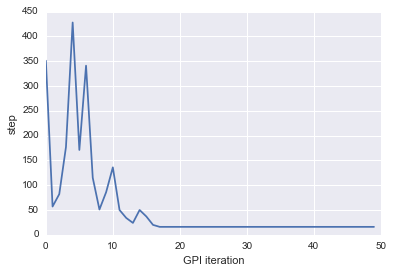

After 5 th iteration (minimum step => 57)
--------G
--------^
--------^
------->^
--------^
--------^

After 10 th iteration (minimum step => 51)
----v---G
----v---^
---->v--^
----->>>^
------->^
------->^

After 15 th iteration (minimum step => 24)
->>>v<--G
----v---^
---->v<-^
--->>>>>^
---^-->>^
-------^^

After 20 th iteration (minimum step => 16)
>>>>v<--G
^---vv--^
^<-->v<-^
--->>>>>^
---^-->>^
-------^^

After 25 th iteration (minimum step => 16)
>>>>v<--G
^---vv--^
^<-v>v<-^
--->>>>>^
-->^^->>^
-->^---^^

After 30 th iteration (minimum step => 16)
>>>>v<--G
^---vv--^
^<-v>v<-^
--->>>>>^
-->^^->>^
-->^---^^

After 35 th iteration (minimum step => 16)
>>>>v<--G
^---vv--^
^<-v>v<-^
^-->>>>>^
-->^^->>^
-->^---^^

After 40 th iteration (minimum step => 16)
>>>>v<--G
^<--vv--^
^<-v>v<-^
^-->>>>>^
-->^^->>^
-->^---^^

After 45 th iteration (minimum step => 16)
>>>>v<--G
^<--vv--^
^<-v>v<-^
^-->>>>>^
^->^^->>^
-->^---^^

After 50 th iteration (minimum step => 16)
>>>>v<--G
^<-vvv<-^
^<

In [103]:
TEST_LENGTH = 50
EPSILON = 0.3
step_log, policy_log = run_performance_test(
    maze_type=MAZE_TYPE, rl_algo=QLambda(alpha=0.1, gamma=0.7),
    epsilon=EPSILON, test_length=TEST_LENGTH, transform_timing=TRANSFORM_TIMING)
visualize_step_transition(step_log)
visualize_policy_transition(step_log, policy_log, sampling_interval=5)

minimum step => 14


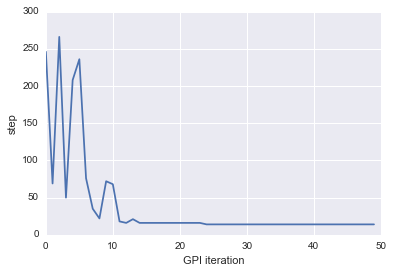

After 5 th iteration (minimum step => 50)
--------G
--------^
--------^
------vv^
------>>^
---------

After 10 th iteration (minimum step => 22)
--------G
--------^
--------^
--->>>v>^
----^->>^
----^-^^<

After 15 th iteration (minimum step => 16)
-->>v---G
--->>v--^
v-->>vv-^
vv->>>v>^
>>>>^->>^
^^>^^>^^^

After 20 th iteration (minimum step => 16)
-->>v<v-G
vv->>>v-^
>v->>vv-^
>v->>>v>^
^>>>^->>^
^^>^^>^^^

After 25 th iteration (minimum step => 14)
-->>v<v-G
vv->>vv-^
>v->>vv-^
>v->>>>>^
>>>>^->>^
^^>^^>^^^

After 30 th iteration (minimum step => 14)
>v>>v<v-G
>v->>vv-^
>v->>vv-^
>v-^>>>>^
>>>>^->>^
^^>^>>^^^

After 35 th iteration (minimum step => 14)
vv>>v>v-G
>v->>vv-^
>v->>vv-^
>v->>>>>^
>>>>^->>^
^>>^>>^^^

After 40 th iteration (minimum step => 14)
vv>>v>v-G
>v->>vv-^
>v->>vv-^
>v->>>>>^
>>>>^->>^
^>>^>>^^^

After 45 th iteration (minimum step => 14)
vv>>v>v-G
>v->>vv-^
>v->>vv-^
>v->>>>>^
>>>>^->>^
^>>^^>^^^

After 50 th iteration (minimum step => 14)
vv>>v>v-G
>v->>vv-^
>v

In [104]:
TEST_LENGTH = 50
EPSILON = 0.7
step_log, policy_log = run_performance_test(
    maze_type=MAZE_TYPE, rl_algo=QLambda(alpha=0.1, gamma=0.7),
    epsilon=EPSILON, test_length=TEST_LENGTH, transform_timing=TRANSFORM_TIMING)
visualize_step_transition(step_log)
visualize_policy_transition(step_log, policy_log, sampling_interval=5)